#### 목표
- 인공신경망을 통해 보스턴 주택가격 회귀 예측 진행해보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
X,y = datasets.fetch_openml('boston',return_X_y = True)
# 기존 sklearn 버전에서는 load_boston 하면서 데이터 불러오기 가능
# 버전 업데이트 이후 datasets 자체 불러오는 함수 삭제됨
# fetch_openml() 함수를 통해 불러오기 가능

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X = X.astype(np.float32)
y = y.astype(np.float32)


In [3]:
# 훈련, 테스트 분리
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 3)



In [4]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
# 인공 신경망 생성
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:

# 뼈대 구축
model = Sequential() 
# 입력
# 여기서 그냥 뉴런(유닛)의 개수는 상관이 없다고 함
# 그냥 학습이 잘될꺼같다 싶을정도로 쌓아주기(근데 점점 낮아져야해요)
model.add(Dense(50 ,input_dim = 13, activation = 'relu'))
# 중간
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
# 출력
model.add(Dense(1, activation = 'linear'))  # linear는 생략해두됨

# 모델 정보 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                700       
                                                                 
 dense_9 (Dense)             (None, 30)                1530      
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,551
Trainable params: 2,551
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 학습 /평가방법 설정
model.compile(loss = 'mse',
              optimizer='adam')  # 아담이 sgb보다 더 좋다.


In [24]:
# 학습
h = model.fit(X_train,y_train, epochs = 200)

Epoch 1/200
12/12 [==============================] - 1s 3ms/step - loss: 1563.6724
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 218.3187
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 88.0497
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 76.0594
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 67.1406
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 65.5046
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 66.2701
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 64.5750
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 62.8693
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 62.7753
Epoch 11/200
12/12 [==============================] - 0s 2ms/step - loss: 61.8856
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 60.9845
Epoch 13/200
12/12 [==

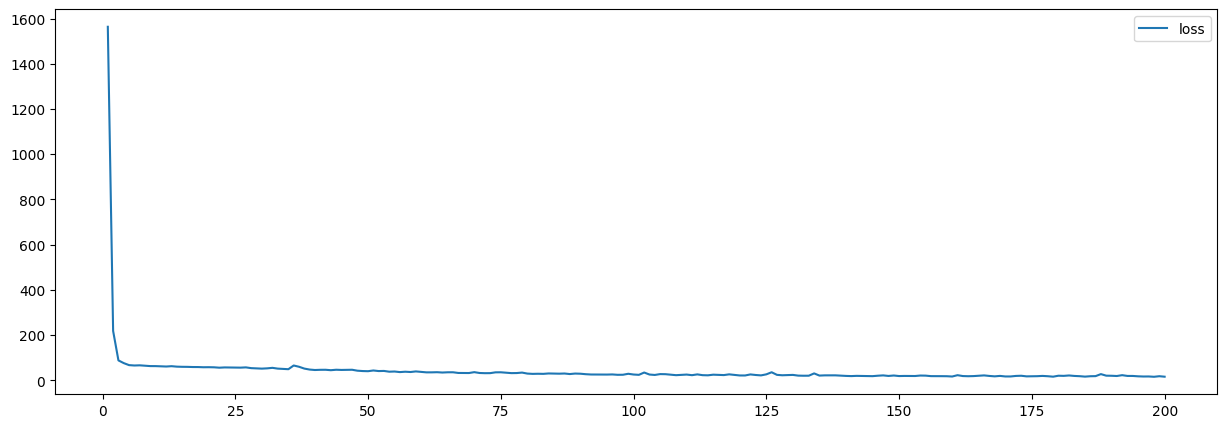

In [26]:
plt.figure(figsize = (15, 5))
plt.plot(range(1,201),
         h.history['loss'],label = 'loss')
plt.legend() # 범례표시
plt.show()

In [27]:
# 평가
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 24.3299


24.329933166503906

In [29]:
# r2_score => 회귀 평가지표
# mse, rmse, mae(절대값을 씌우는 것),r2_score (선형에서 (회귀,score())이거 할때 쓰는게 r2 score!)
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2_score(y_test,pred)


5/5 [==============================] - 0s 2ms/step


0.6906574699107622

In [10]:
# 1에 가까울수록 오차가 적음을 의미
# 반복 횟수, 하이퍼 파라미터 => 일반화가 덜 된 모델일 수 있음